Анализ датасета криптовалюты Ethereum

Для удобства просмотра и получения реккомендаций, все выведено в одном файле, к презентации проекта будет структурирован код.

В последнем методе не понимаю как вывести метрики моделей LSTM и GRU


In [1]:
# main.py
import pandas as pd
import numpy as np
import kagglehub
import sys
sys.path.append('/content/sample_data')
import loader_dataset as loader
import csv

# Загрузка датасета с сайта https://www.kaggle.com/
file_path = "/content/sample_data/coin_Ethereum.csv"
print(file_path)

dataset = loader.load_csv_file(file_path)

/content/sample_data/coin_Ethereum.csv
Данные успешно загружены.


In [2]:
# Просмотр первых 5 записей
print("Первые 5 записей:\n", dataset.head())

# Просмотр последних 5 записей
print("\nПоследние 5 записей:\n", dataset.tail())

# Информация о типах данных
print("\nТипы данных:\n")
print(dataset.info())

# Статистическая информация
print("\nСтатистическая информация:\n", dataset.describe())

# Проверка на пропущенные значения
print("\nПропущенные значения:\n", dataset.isnull().sum())

Первые 5 записей:
    SNo      Name Symbol                 Date      High       Low      Open  \
0    1  Ethereum    ETH  2015-08-08 23:59:59  2.798810  0.714725  2.793760   
1    2  Ethereum    ETH  2015-08-09 23:59:59  0.879810  0.629191  0.706136   
2    3  Ethereum    ETH  2015-08-10 23:59:59  0.729854  0.636546  0.713989   
3    4  Ethereum    ETH  2015-08-11 23:59:59  1.131410  0.663235  0.708087   
4    5  Ethereum    ETH  2015-08-12 23:59:59  1.289940  0.883608  1.058750   

      Close     Volume     Marketcap  
0  0.753325   674188.0  4.548689e+07  
1  0.701897   532170.0  4.239957e+07  
2  0.708448   405283.0  4.281836e+07  
3  1.067860  1463100.0  6.456929e+07  
4  1.217440  2150620.0  7.364501e+07  

Последние 5 записей:
        SNo      Name Symbol                 Date         High          Low  \
2155  2156  Ethereum    ETH  2021-07-02 23:59:59  2155.596496  2021.824808   
2156  2157  Ethereum    ETH  2021-07-03 23:59:59  2237.567155  2117.590013   
2157  2158  Ethereum 

In [3]:
# Уменьшение размерности данных и преобразование типов данных
dataset = dataset.drop(['Name', 'Symbol'], axis=1)
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['date_int'] = dataset['Date'].astype('int64') // 10**9
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        2160 non-null   int64         
 1   Date       2160 non-null   datetime64[ns]
 2   High       2160 non-null   float64       
 3   Low        2160 non-null   float64       
 4   Open       2160 non-null   float64       
 5   Close      2160 non-null   float64       
 6   Volume     2160 non-null   float64       
 7   Marketcap  2160 non-null   float64       
 8   date_int   2160 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 152.0 KB
None


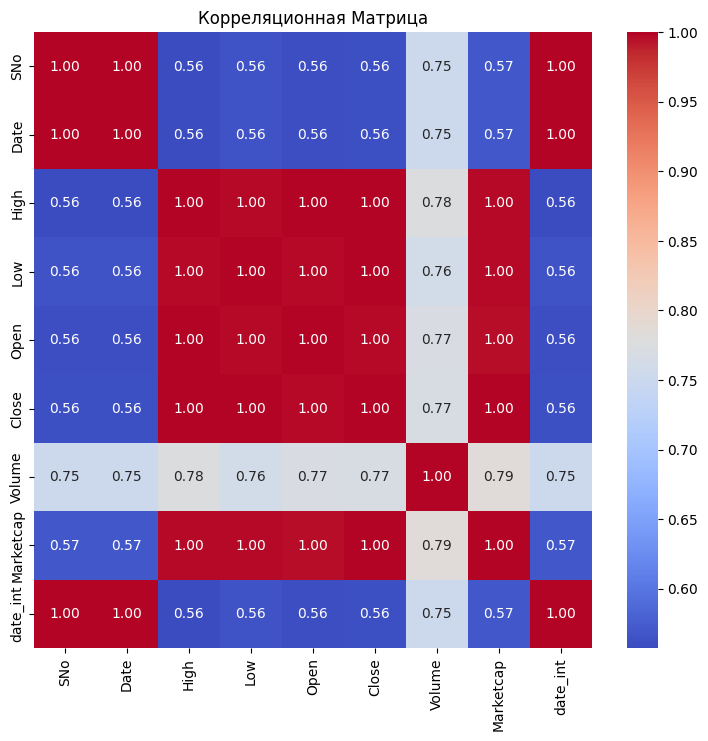

In [4]:
# Матрица корреляций
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

correlation_matrix = dataset.corr()
fig, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(correlation_matrix.T, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная Матрица')
plt.show()

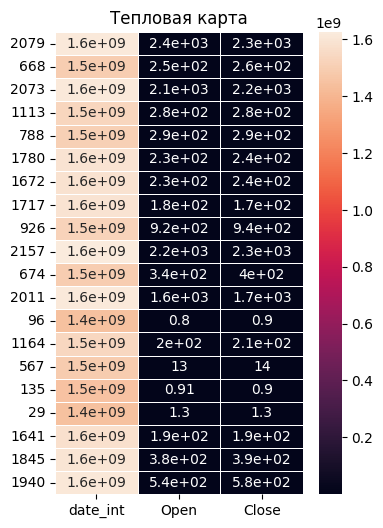

In [5]:
# Визуализация тепловой карты
dataset_heat = dataset[['date_int', 'Open', 'Close']]
dataset_heat = dataset_heat.sample(n=20, random_state=42)

plt.figure(figsize=(4, 6))
sns.heatmap(dataset_heat, annot=True, linewidths=.5)
plt.title('Тепловая карта')
plt.show()

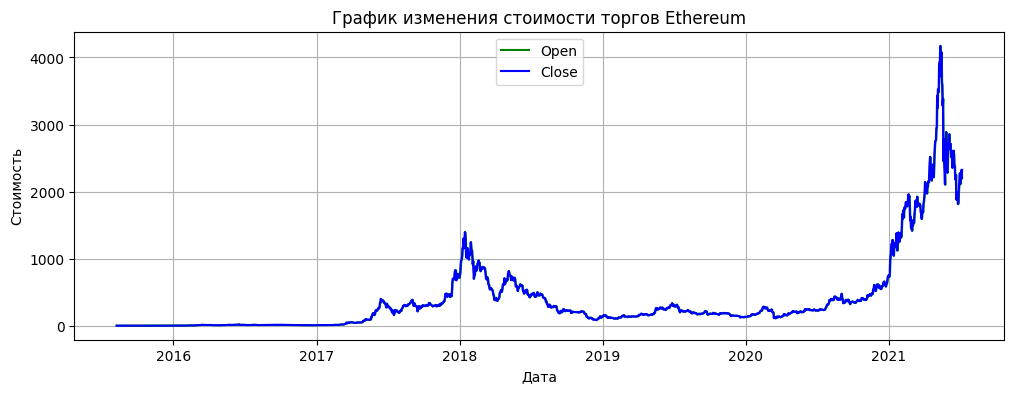

In [6]:
# Графики роста и падения стоимости
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))
plt.plot(dataset['Date'], dataset['Open'], color='green', label='Open')
plt.plot(dataset['Date'], dataset['Close'], color='blue', label='Close')
plt.title('График изменения торгов Ethereum')
plt.legend(loc=9)
plt.xlabel('Дата')
plt.ylabel('Стоимость')
plt.grid()
plt.show()

                         Open
Date                         
2017-01-01 23:59:59   7.98231
2017-01-02 23:59:59   8.17087
2017-01-03 23:59:59   8.37458
2017-01-04 23:59:59   9.70929
2017-01-05 23:59:59  11.28680
2017-01-06 23:59:59  10.28580
2017-01-07 23:59:59  10.24090
2017-01-08 23:59:59   9.87258
2017-01-09 23:59:59  10.31380
2017-01-10 23:59:59  10.36950


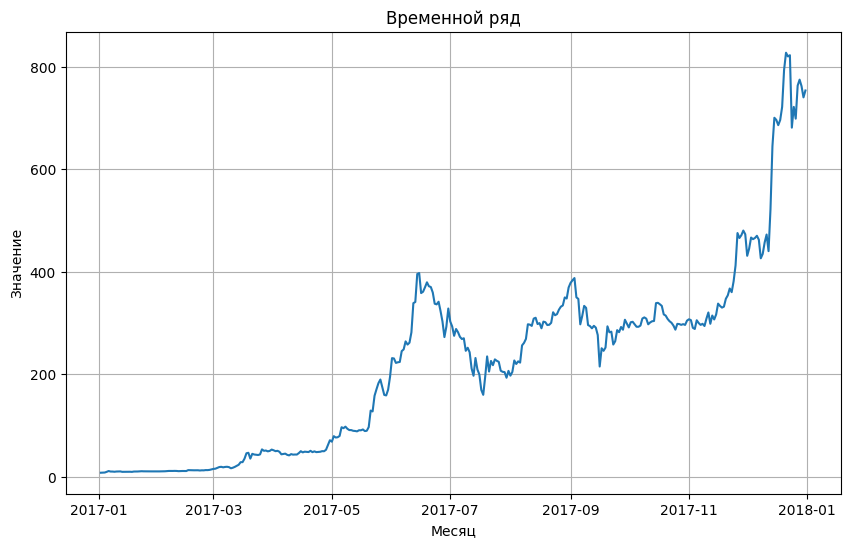

ADF Statistic: 0.533155
p-value: 0.985847
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Выделяем временной интервал (2017 год)
dataset_year = dataset[['Date', 'Open']]
start_date = "2017-01-01"
end_date = "2017-12-31"
dataset_year = dataset_year[(dataset_year['Date'] >= start_date) & (dataset_year['Date'] < end_date)]
dataset_year.set_index('Date', inplace=True)
print(dataset_year[:10])

# Визуализируем временной ряд
plt.figure(figsize=(10, 6))
plt.plot(dataset_year, label='Стоимость открытия торгов')
plt.title("Временной ряд")
plt.xlabel("Месяц")
plt.ylabel("Значение")
plt.grid(True)
plt.show()

# Тест Дики-Фуллера
result = adfuller(dataset_year["Open"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
# Нестационарный временной ряд
"""
Tест Дики-Фуллера показывает:
✓ ADF статистика: 0.533155. Значение положительное - признак нестационарности.
✓ p-значение: 0.985847. Значение значительно выше 0.05, не отвергает нулевую гипотезу о нестационарности ряда.
✓ Критические значения для разных уровней значимости ниже ADF, что также подтверждает нестационарность ряда.
"""

<Figure size 1000x400 with 0 Axes>

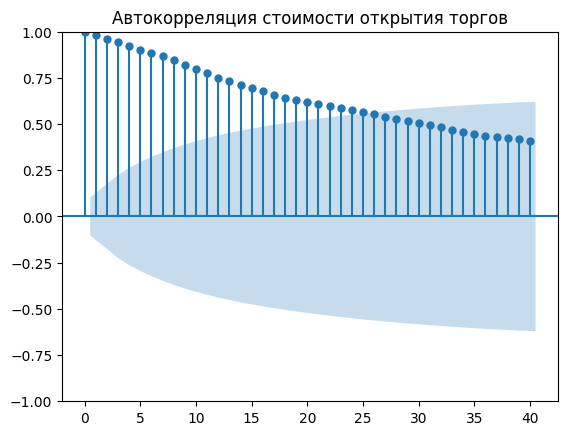

In [8]:
# Автокорреляция
from statsmodels.graphics.tsaplots import plot_acf

# Построение автокорреляции
plt.figure(figsize=(10, 4))
plot_acf(dataset_year, lags=40)
plt.title('Автокорреляция открытия торгов')
plt.show()

ADF Statistic (после дифференцирования): -6.601271913757222
p-value (после дифференцирования): 6.726360365823615e-09
Open    float64
dtype: object


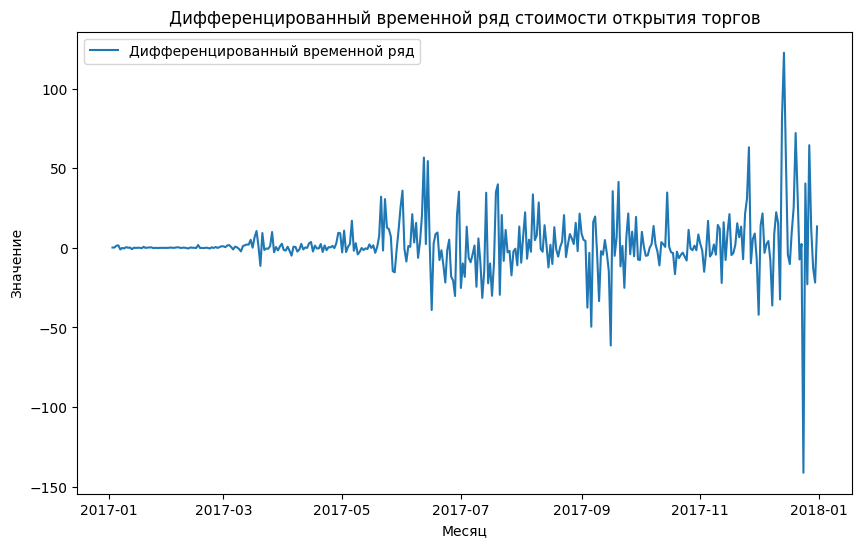

In [12]:
# Дифференцирование данных для достижения стационарности
data_diff = dataset_year.diff().dropna()

# Повторный тест ADF
result_diff = adfuller(data_diff['Open'])
print('ADF Statistic (после дифференцирования):', result_diff[0])
print('p-value (после дифференцирования):', result_diff[1])
print(data_diff.dtypes)

# Визуализация дифференцированных данных
plt.figure(figsize=(10, 6))
plt.plot(data_diff, label='Дифференцированный временной ряд')
plt.title('Дифференцированный временной ряд открытия торгов')
plt.xlabel('Месяц')
plt.ylabel('Значение')
plt.legend()
plt.show()

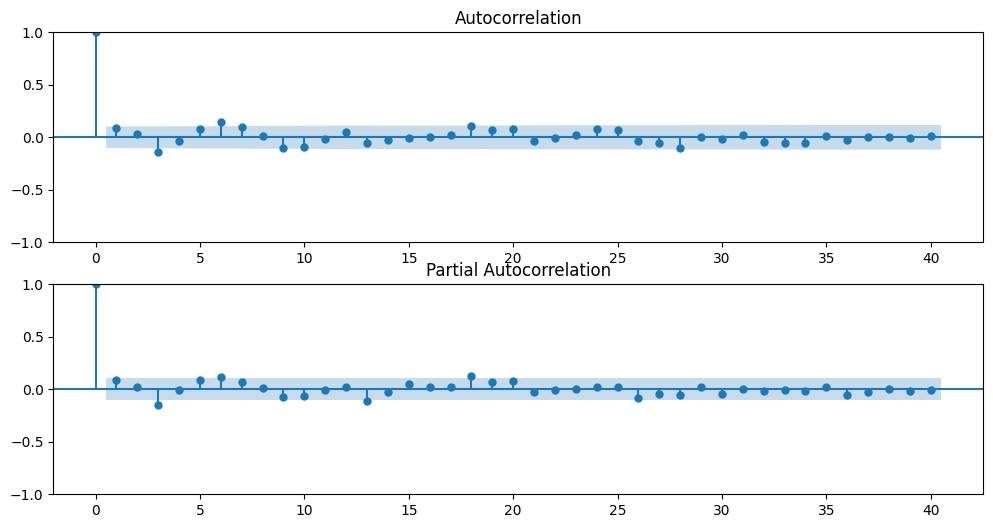

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Визуализация автокорреляции и частичной автокорреляции
plt.figure(figsize=(10, 6))
plt.subplot(211)
plot_acf(data_diff, ax=plt.gca(), lags=40)
plt.subplot(212)
plot_pacf(data_diff, ax=plt.gca(), lags=40)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1574.750
Date:                Wed, 02 Apr 2025   AIC                           3155.501
Time:                        08:23:35   BIC                           3167.184
Sample:                    01-01-2017   HQIC                          3160.145
                         - 12-30-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1913      0.388      0.493      0.622      -0.570       0.952
ma.L1         -0.0927      0.386     -0.240      0.810      -0.850       0.665
sigma2       343.1987      8.972     38.252      0.0

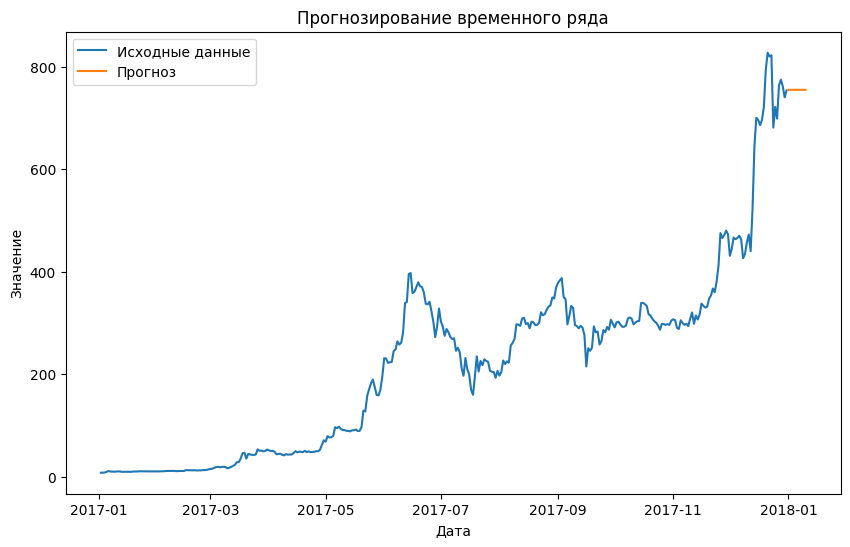

Mean Absolute Error: 79.13608002764155
Mean Squared Error: 8192.709162716661


In [17]:
# Обучение модели ARIMA
model = ARIMA(dataset_year, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

# Прогнозирование
forecast = model_fit.forecast(steps=10)
print(forecast)

# Визуализация прогноза
plt.figure(figsize=(10, 6))
plt.plot(dataset_year, label='Исходные данные')
plt.plot(forecast, label='Прогноз')
plt.title('Прогнозирование временного ряда')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.show()

# Оценка модели
data_train = dataset_year.iloc[:-10]
data_test = dataset_year.iloc[-10:]
model = ARIMA(data_train, order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=10)
mse = mean_squared_error(data_test, forecast)
mae = mean_absolute_error(data_test, forecast)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

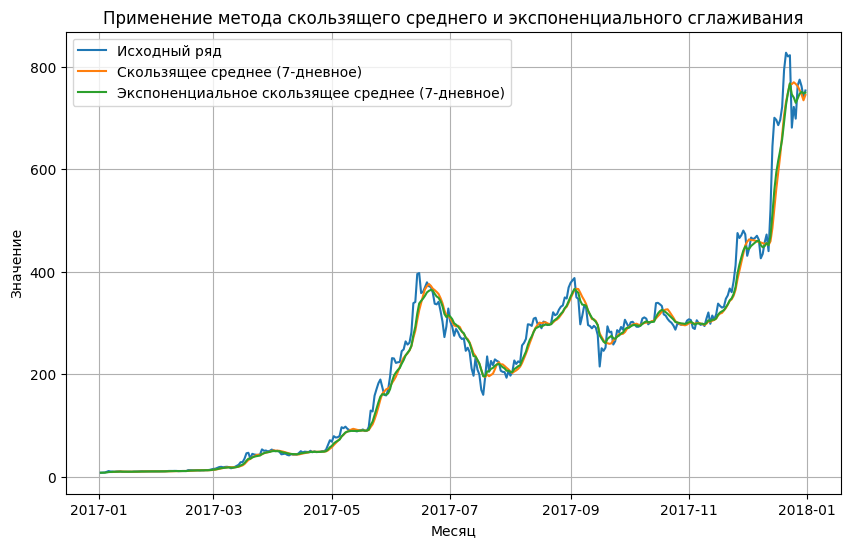

In [13]:
# Метод скользящего среднего (Moving Average) и Экспоненциальное скользящее среднее (ema)

# Применяем скользящее среднее
window_size = 7  # Размер окна

# Метод скользящего среднего (Moving Average)
moving_average = dataset_year['Open'].rolling(window=window_size).mean() # для заполнения пустых значений: .fillna(method='bfill')

# Применяем экспоненциальное скользящее среднее
ema = dataset_year['Open'].ewm(span=window_size, adjust=False).mean()

# Визуализируем исходный временной ряд, скользящее среднее и экспоненциальное среднее
plt.figure(figsize=(10, 6))
plt.plot(dataset_year.index, dataset_year['Open'], label='Исходный ряд')
plt.plot(moving_average.index, moving_average, label=f'Скользящее среднее ({window_size}-дневное)')
plt.plot(ema.index, ema, label=f'Экспоненциальное скользящее среднее ({window_size}-дневное)')
plt.title("Применение метода скользящего среднего и экспоненциального сглаживания")
plt.xlabel("Месяц")
plt.ylabel("Значение")
plt.legend()
plt.grid(True)
plt.show()

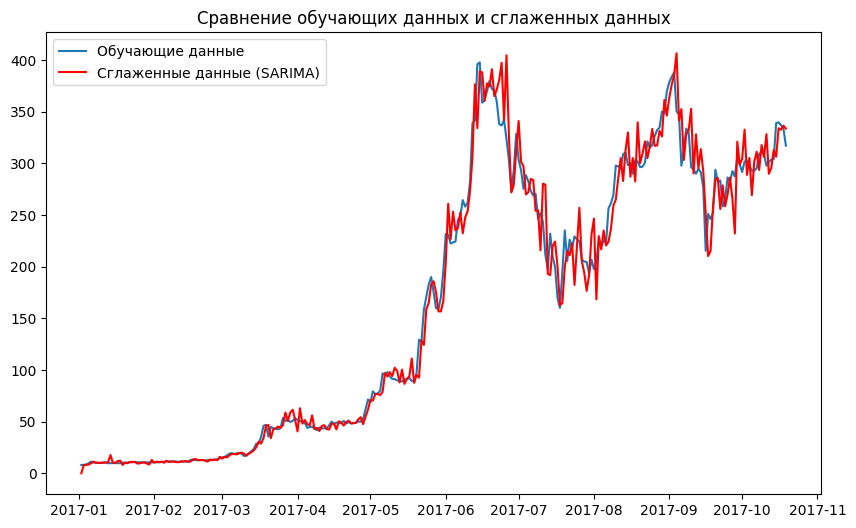

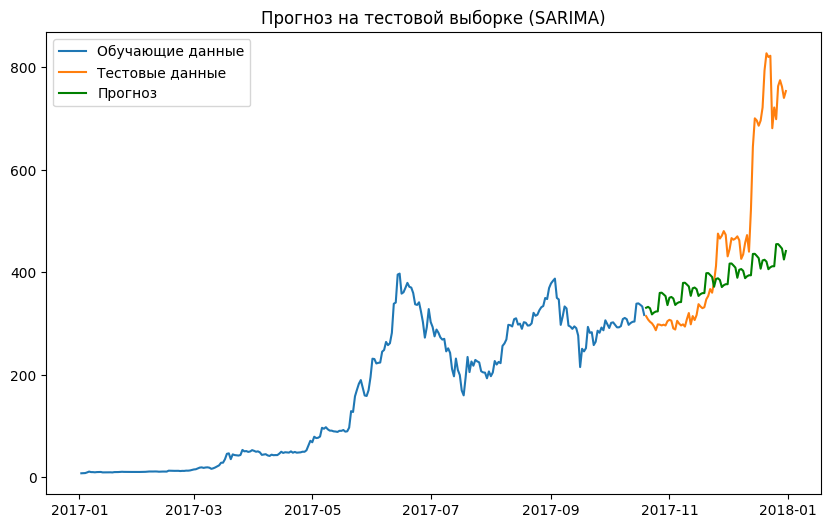

Mean Absolute Error (MAE): 114.613
Mean Squared Error (MSE): 26936.364
Root Mean Squared Error (RMSE): 164.123


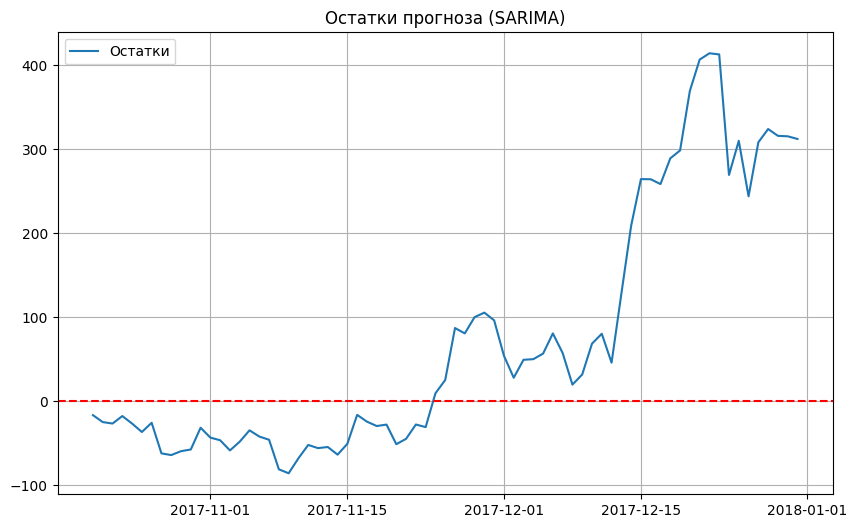

In [14]:
# Модели SARIMA (Seasonal ARIMA)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

# Отключение предупреждений
warnings.filterwarnings("ignore")

# Разделение данных на обучающую и тестовую выборки
train_size = int(len(dataset_year) * 0.8)
train_data, test_data = dataset_year[:train_size], dataset_year[train_size:]

# Построение модели SARIMA с произвольными параметрами
model = SARIMAX(train_data, order=(2, 1, 2), seasonal_order=(0, 2, 1, 12))
model_fit = model.fit()

# Визуализация исходных данных и сглаженных данных с использованием модели SARIMA
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Обучающие данные')
plt.plot(model_fit.fittedvalues, color='red', label='Сглаженные данные (SARIMA)')
plt.title('Сравнение обучающих данных и сглаженных данных')
plt.legend()
plt.show()

# Прогнозирование для тестовой выборки
forecast_test = model_fit.forecast(steps=len(test_data))
# Визуализация прогноза на тестовой выборке
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Обучающие данные')
plt.plot(test_data.index, test_data, label='Тестовые данные')
plt.plot(test_data.index, forecast_test, color='green', label='Прогноз')
plt.title('Прогноз на тестовой выборке (SARIMA)')
plt.legend()
plt.show()

# Метрики качества
mae = mean_absolute_error(test_data, forecast_test)
mse = mean_squared_error(test_data, forecast_test)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')

# Визуализация остатков
residuals = test_data['Open'] - forecast_test
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Остатки')
plt.axhline(0, linestyle='--', color='red')
plt.title('Остатки прогноза (SARIMA)')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
# LSTM
!pip install tensorflow

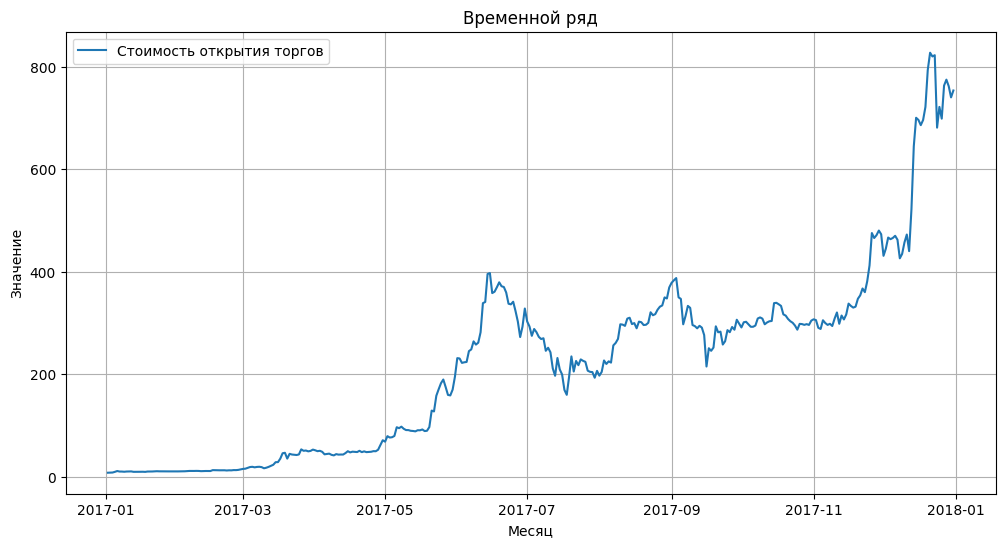

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Визуализиция данных
plt.figure(figsize=(12, 6))
plt.plot(dataset_year.index, dataset_year['Open'], label='Стоимость открытия торгов')
plt.title("Временной ряд")
plt.xlabel("Месяц")
plt.ylabel("Значение")
plt.legend()
plt.grid(True)
plt.show()

In [44]:
# Подготовка данных для модели LSTM:
# Преобразование данных в массив NumPy
data_values = dataset_year['Open'].values.reshape(-1, 1)

# Нормализация данных [0, 1]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_values)

# Разделим данные на обучающую и тестовую выборки
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

In [45]:
# Функция для создания последовательных данных для модели LSTM
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Определим длину последовательности и создадим последовательные данные
seq_length = 12
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Создание и обучение модели LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0531
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0280
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0100
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0040
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0023
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0014
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.8437e-04
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0011
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0011
Epoch 13/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0010
Epoch 14/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0010
Epoch 15/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.3348e-04
Epoch 16/100
9

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


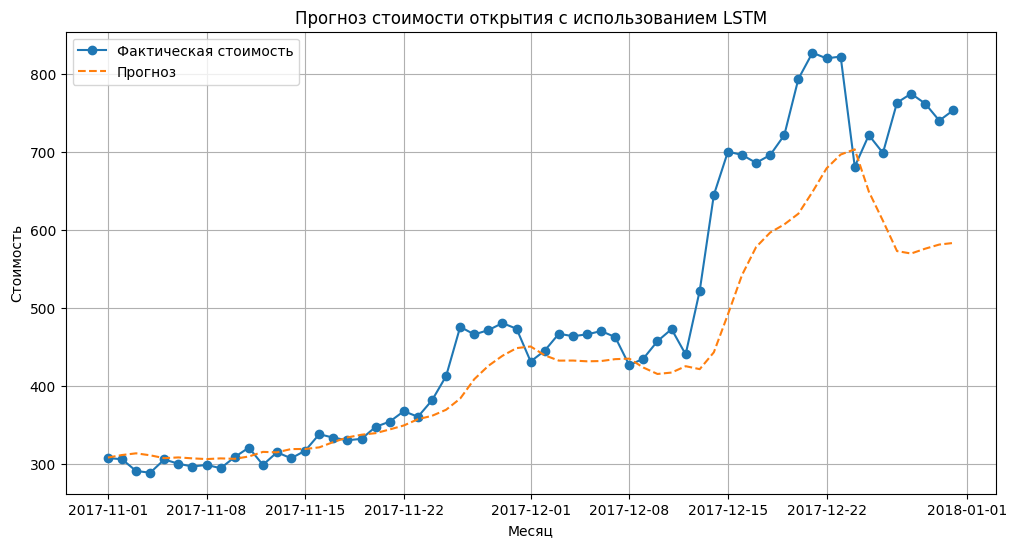

Mean Absolute Error (MAE): 58.308
Mean Squared Error (MSE): 7606.665
Root Mean Squared Error (RMSE): 87.216


In [46]:
# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Инверсия масштабирования, чтобы получить исходные значения
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Визуализируйте результаты прогноза
plt.figure(figsize=(12, 6))
plt.plot(dataset_year.index[-len(y_test_inv):], y_test_inv, label='Фактическая стоимость', marker='o')
plt.plot(dataset_year.index[-len(y_test_inv):], y_pred_inv, label='Прогноз', linestyle='--')
plt.title("Прогноз стоимости открытия с использованием LSTM")
plt.xlabel("Месяц")
plt.ylabel("Стоимость")
plt.legend()
plt.grid(True)
plt.show()

# Оценка точности прогноза
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

In [47]:
!pip install tensorflow

Epoch 1/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0373
Epoch 2/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0352 
Epoch 3/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0327
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


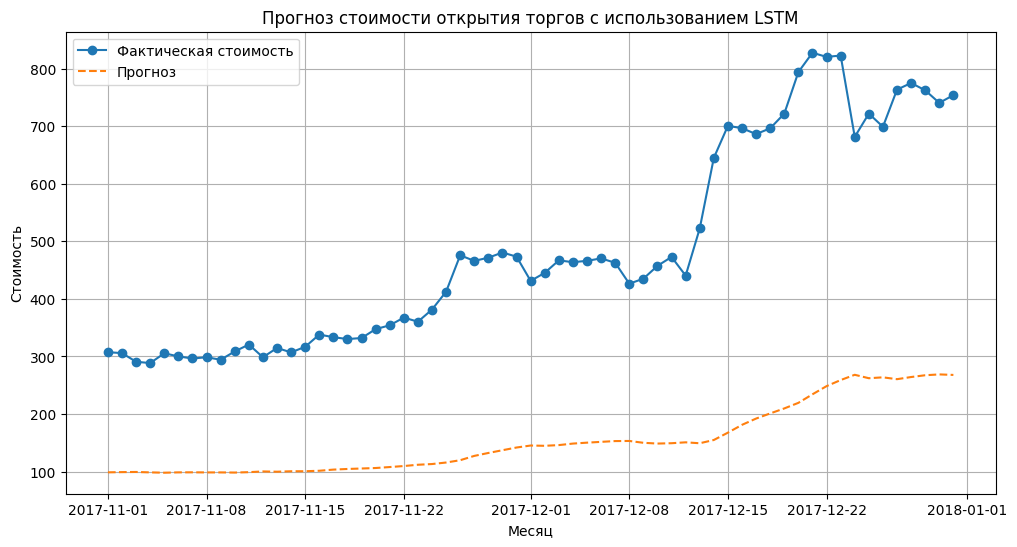

Mean Absolute Error (MAE): 334.258
Mean Squared Error (MSE): 126845.964
Root Mean Squared Error (RMSE): 356.154


In [48]:
# Глубокое обучение LSTM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Используем только столбец Open
data_values = dataset_year['Open'].values.reshape(-1, 1)

# Нормализация данных [0, 1]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_values)

# Разделим данные на обучающую и тестовую выборки
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# Функция для создания последовательных данных для модели LSTM
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Определим длину последовательности и создим последовательные данные
seq_length = 12
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Создание и обучиние модель LSTM
model = Sequential()
model.add(LSTM(3, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=3, batch_size=128)

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Инверсия масштабирования, чтобы получить исходные значения
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Визуализация результов прогноза
plt.figure(figsize=(12, 6))
plt.plot(dataset_year.index[-len(y_test_inv):], y_test_inv, label='Фактическая стоимость', marker='o')
plt.plot(dataset_year.index[-len(y_test_inv):], y_pred_inv, label='Прогноз', linestyle='--')
plt.title("Прогноз стоимости открытия торгов с использованием LSTM")
plt.xlabel("Месяц")
plt.ylabel("Стоимость")
plt.legend()
plt.grid(True)
plt.show()

# Оценка точности прогноза
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")



Epoch 1/10
233/233 - 3s - 12ms/step - loss: 0.0041
Epoch 2/10
233/233 - 1s - 5ms/step - loss: 0.0012
Epoch 3/10
233/233 - 2s - 10ms/step - loss: 0.0011
Epoch 4/10
233/233 - 1s - 4ms/step - loss: 9.3992e-04
Epoch 5/10
233/233 - 1s - 4ms/step - loss: 8.0527e-04
Epoch 6/10
233/233 - 2s - 7ms/step - loss: 6.8242e-04
Epoch 7/10
233/233 - 3s - 11ms/step - loss: 6.0170e-04
Epoch 8/10
233/233 - 2s - 7ms/step - loss: 5.5427e-04
Epoch 9/10
233/233 - 4s - 17ms/step - loss: 5.0203e-04
Epoch 10/10
233/233 - 2s - 7ms/step - loss: 5.1829e-04
Epoch 1/10
233/233 - 4s - 17ms/step - loss: 0.0054
Epoch 2/10
233/233 - 2s - 7ms/step - loss: 6.8534e-04
Epoch 3/10
233/233 - 2s - 8ms/step - loss: 6.6628e-04
Epoch 4/10
233/233 - 2s - 7ms/step - loss: 5.4332e-04
Epoch 5/10
233/233 - 1s - 6ms/step - loss: 6.3539e-04
Epoch 6/10
233/233 - 2s - 9ms/step - loss: 4.4597e-04
Epoch 7/10
233/233 - 1s - 4ms/step - loss: 4.4626e-04
Epoch 8/10
233/233 - 1s - 4ms/step - loss: 3.9716e-04
Epoch 9/10
233/233 - 1s - 5ms/step - l

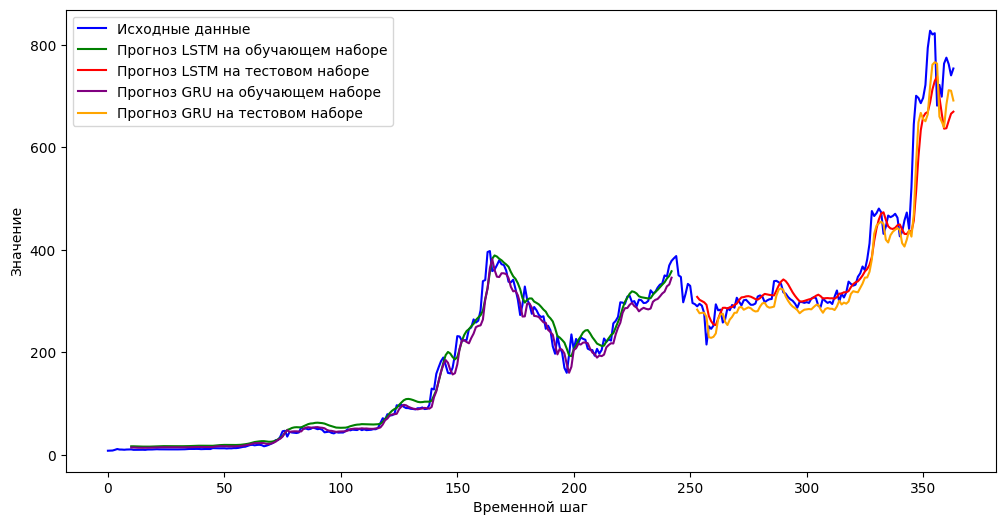

'print(\'\nLSTM\n\')\nmae_lstm = mean_absolute_error(test_predict_lstm, train_predict_lstm )\nmse_lstm = mean_squared_error(train_predict_lstm, test_predict_lstm)\nrmse_lstm = np.sqrt(mse)\n\nprint(f"Mean Absolute Error (MAE): {mae_lstm:.3f}")\nprint(f"Mean Squared Error (MSE): {mse_lstm:.3f}")\nprint(f"Root Mean Squared Error (RMSE): {rmse_lstm:.3f}")\n\nprint(\'\nGRU\n\')\nmae_gru = mean_absolute_error(train_predict_gru, test_predict_gru)\nmse_gru = mean_squared_error(train_predict_gru, test_predict_gru)\nrmse_gru = np.sqrt(mse)\n\nprint(f"Mean Absolute Error (MAE): {mae_gru:.3f}")\nprint(f"Mean Squared Error (MSE): {mse_gru:.3f}")\nprint(f"Root Mean Squared Error (RMSE): {rmse_gru:.3f}")'

In [20]:
# LSTM и GRU
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense

# Используем только столбец Open
data_values = dataset_year['Open'].values.reshape(-1, 1)

# Нормализация данных [0, 1]
scaler = MinMaxScaler()
dataset = scaler.fit_transform(data_values)

# Разбиваем данные на обучающий и тестовый наборы
train_size = int(len(dataset) * 0.67)
train_data, test_data = dataset[:train_size], dataset[train_size:]

# Функция для создания датасета с последовательными данными
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back)])
        Y.append(dataset[i + look_back])
    return np.array(X), np.array(Y)

look_back = 10  # Количество предыдущих временных шагов для учитывания

# Подготовка данных в формате (количество примеров, количество временных шагов, количество признаков)
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

# Создаем модель LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, input_shape=(look_back, 1)))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Обучаем модель LSTM
model_lstm.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

# Создаем модель GRU
model_gru = Sequential()
model_gru.add(GRU(units=50, input_shape=(look_back, 1)))
model_gru.add(Dense(units=1))
model_gru.compile(optimizer='adam', loss='mean_squared_error')

# Обучаем модель GRU
model_gru.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

# Делаем прогнозы с использованием обеих моделей
train_predict_lstm = model_lstm.predict(X_train)
test_predict_lstm = model_lstm.predict(X_test)

train_predict_gru = model_gru.predict(X_train)
test_predict_gru = model_gru.predict(X_test)

# Инвертируем масштабирование данных
train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)

train_predict_gru = scaler.inverse_transform(train_predict_gru)
test_predict_gru = scaler.inverse_transform(test_predict_gru)

# Визуализируем прогнозы
train_plot_lstm = np.empty_like(dataset)
train_plot_lstm[:] = np.nan
train_plot_lstm[look_back:len(train_predict_lstm) + look_back, 0] = train_predict_lstm[:, 0]

test_plot_lstm = np.empty_like(dataset)
test_plot_lstm[:] = np.nan
offset = len(train_predict_lstm) + (look_back * 2)
test_plot_lstm[offset:len(test_predict_lstm) + offset, 0] = test_predict_lstm[:, 0]

train_plot_gru = np.empty_like(dataset)
train_plot_gru[:] = np.nan
train_plot_gru[look_back:len(train_predict_gru) + look_back, 0] = train_predict_gru[:, 0]

test_plot_gru = np.empty_like(dataset)
test_plot_gru[:] = np.nan
offset = len(train_predict_gru) + (look_back * 2)
test_plot_gru[offset:len(test_predict_gru) + offset, 0] = test_predict_gru[:, 0]

# Визуализируем результаты
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(dataset), label='Исходные данные', color='blue')
plt.plot(train_plot_lstm, label='Прогноз LSTM на обучающем наборе', color='green')
plt.plot(test_plot_lstm, label='Прогноз LSTM на тестовом наборе', color='red')
plt.plot(train_plot_gru, label='Прогноз GRU на обучающем наборе', color='purple')
plt.plot(test_plot_gru, label='Прогноз GRU на тестовом наборе', color='orange')
plt.xlabel('Временной шаг')
plt.ylabel('Значение')
plt.legend()
plt.show()

# Оценка модели
# Как оценить модель?

# Оценка точности прогноза
'''print('\nLSTM\n')
mae_lstm = mean_absolute_error(test_predict_lstm, train_predict_lstm )
mse_lstm = mean_squared_error(train_predict_lstm, test_predict_lstm)
rmse_lstm = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae_lstm:.3f}")
print(f"Mean Squared Error (MSE): {mse_lstm:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lstm:.3f}")

print('\nGRU\n')
mae_gru = mean_absolute_error(train_predict_gru, test_predict_gru)
mse_gru = mean_squared_error(train_predict_gru, test_predict_gru)
rmse_gru = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae_gru:.3f}")
print(f"Mean Squared Error (MSE): {mse_gru:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gru:.3f}")'''